# Chapter 1 The Machine Learning Landscape


### REPRODUCE CODE PADA CHAPTER 1


Menyiapkan environment python:

In [185]:
import sys

assert sys.version_info >= (3, 7)

Mengimport library Scikit-Learn:

In [186]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

Mengimport matplotlib.pyplot sebagai default font dan mempercantik hasil visualisasi:

In [187]:
import matplotlib.pyplot as plt

plt.rc('font', size=12)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

Mengimput Numpy agar output stabil saat running:

In [188]:
import numpy as np

np.random.seed(42)

Kode example 1-1:

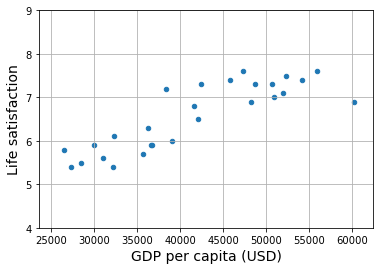

[[6.30165767]]


In [189]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Download and prepare the data
data_root = "https://github.com/ageron/data/raw/main/"
lifesat = pd.read_csv(data_root + "lifesat/lifesat.csv")
X = lifesat[["GDP per capita (USD)"]].values
y = lifesat[["Life satisfaction"]].values

# Visualize the data
lifesat.plot(kind='scatter', grid=True,
             x="GDP per capita (USD)", y="Life satisfaction")
plt.axis([23_500, 62_500, 4, 9])
plt.show()

# Select a linear model
model = LinearRegression()

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
X_new = [[37_655.2]]  # Cyprus' GDP per capita in 2020
print(model.predict(X_new)) # outputs [[6.30165767]]

Apabila ingin mengganti model ML, kita dapat melakukannya dengan mudah dengan cara mengganti kode importnya saja. Pada bagian ini, Linear Regression akan diganti menjadi KNN

In [190]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=3)

In [191]:
# Select a 3-Nearest Neighbors regression model
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=3)

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
print(model.predict(X_new)) # outputs [[6.33333333]]

[[6.33333333]]


Bagian ini akan memproses data "Life Satisfaction". Pada bagian ini saya akan menggunakan dataset si penulis buku. Namun penulis buku menjelaskan bahwa dataset terbaru dapat diundur pada link berikut: 
1. Better Life Index : https://data-explorer.oecd.org/vis?tenant=archive&df[ds]=DisseminateArchiveDMZ&df[id]=DF_BLI&df[ag]=OECD
2. World Bank GDP : https://ourworldindata.org/grapher/gdp-per-capita-worldbank

Mengunduh dataset:

In [226]:
from pathlib import Path
import urllib.request

# Define the data path
datapath = Path("C:/Users/Atanasius/OneDrive/Documents/A - KULIAH/A - SEMESTER 8/MACHINE LEARNING/Machine-Learning-Enrichment_Task/Chapter-1/datasets") / "datasets" / "lifesat"
datapath.mkdir(parents=True, exist_ok=True)

# Download files if they don't exist
data_root = "https://github.com/ageron/data/raw/main/"
for filename in ("oecd_bli.csv", "gdp_per_capita.csv"):
    if not (datapath / filename).is_file():
        print("Downloading", filename)
        url = data_root + "lifesat/" + filename
        urllib.request.urlretrieve(url, datapath / filename)


In [227]:
oecd_bli = pd.read_csv(datapath / "oecd_bli.csv")
gdp_per_capita = pd.read_csv(datapath / "gdp_per_capita.csv")

In [228]:
gdp_year = 2020
gdppc_col = "GDP per capita (USD)"
lifesat_col = "Life satisfaction"

gdp_per_capita = gdp_per_capita[gdp_per_capita["Year"] == gdp_year]
gdp_per_capita = gdp_per_capita.drop(["Code", "Year"], axis=1)
gdp_per_capita.columns = ["Country", gdppc_col]
gdp_per_capita.set_index("Country", inplace=True)

gdp_per_capita.head()

,GDP per capita (USD)
Country,
Afghanistan,1978.961579
Africa Eastern and Southern,3387.594670
Africa Western and Central,4003.158913
Albania,13295.410885
Algeria,10681.679297


Memproses data OECD BLI sehingga hanya tersisa kolom Life Satisfaction:

In [229]:
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")

oecd_bli.head()

Indicator,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,Housing expenditure,...,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,5.0,NaN,81.0,13.04,73.0,63.5,1.1,32759.0,427064.0,20.0,...,49126.0,95.0,NaN,85.0,2.7,502.0,14.35,91.0,93.0,21.0
Austria,16.0,0.9,85.0,6.66,72.0,80.6,0.5,33541.0,308325.0,21.0,...,50349.0,92.0,1.6,70.0,1.3,492.0,14.55,80.0,92.0,17.0
Belgium,15.0,1.9,77.0,4.75,63.0,70.1,1.0,30364.0,386006.0,21.0,...,49675.0,91.0,2.2,74.0,2.0,503.0,15.70,89.0,84.0,19.3
Brazil,10.0,6.7,49.0,7.13,61.0,35.6,26.7,NaN,NaN,NaN,...,NaN,90.0,NaN,NaN,2.2,395.0,NaN,79.0,73.0,16.2
Canada,7.0,0.2,91.0,3.69,73.0,82.2,1.3,30854.0,423849.0,22.0,...,47622.0,93.0,2.6,88.0,2.9,523.0,14.56,68.0,91.0,17.3


Menggabungkan kedua data sehingga hanya tersisa kolom GDP per Capita dan kolom Life Satisfaction yang tersisa:

In [230]:
full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                              left_index=True, right_index=True)
full_country_stats.sort_values(by=gdppc_col, inplace=True)
full_country_stats = full_country_stats[[gdppc_col, lifesat_col]]

full_country_stats.head()

,GDP per capita (USD),Life satisfaction
Country,,
South Africa,11466.189672,4.7
Colombia,13441.492952,6.3
Brazil,14063.982505,6.4
Mexico,17887.750736,6.5
Chile,23324.524751,6.5


In [231]:
min_gdp = 23_500
max_gdp = 62_500

country_stats = full_country_stats[(full_country_stats[gdppc_col] >= min_gdp) &
                                   (full_country_stats[gdppc_col] <= max_gdp)]
country_stats.head()

,GDP per capita (USD),Life satisfaction
Country,,
Russia,26456.387938,5.8
Greece,27287.083401,5.4
Turkey,28384.987785,5.5
Latvia,29932.493910,5.9
Hungary,31007.768407,5.6


In [232]:
country_stats.to_csv(datapath / "lifesat.csv")
full_country_stats.to_csv(datapath / "lifesat_full.csv")

In [234]:
print("Columns in DataFrame:", country_stats.columns)
print("Index (Countries):", country_stats.index)
print("GDP per Capita Column:", gdppc_col)
print("Life Satisfaction Column:", lifesat_col)

Columns in DataFrame: Index(['GDP per capita (USD)', 'Life satisfaction'], dtype='object')
Index (Countries): Index(['Russia', 'Greece', 'Turkey', 'Latvia', 'Hungary', 'Portugal', 'Poland',
       'Estonia', 'Spain', 'Slovenia', 'Lithuania', 'Israel', 'Italy',
       'United Kingdom', 'France', 'New Zealand', 'Canada', 'Finland',
       'Belgium', 'Australia', 'Sweden', 'Germany', 'Austria', 'Iceland',
       'Netherlands', 'Denmark', 'United States'],
      dtype='object', name='Country')
GDP per Capita Column: GDP per capita (USD)
Life Satisfaction Column: Life satisfaction


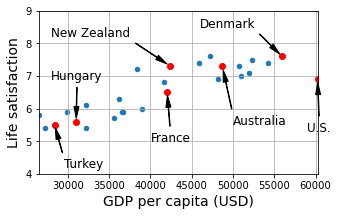

In [236]:
import matplotlib.pyplot as plt
from pathlib import Path

# Use exact column names from your DataFrame
gdppc_col = "GDP per capita (USD)"
lifesat_col = "Life satisfaction"

# Calculate min and max GDP for axis limits
min_gdp = country_stats[gdppc_col].min()
max_gdp = country_stats[gdppc_col].max()

# Plot scatter plot
country_stats.plot(kind='scatter', figsize=(5, 3), grid=True,
                   x=gdppc_col, y=lifesat_col)

min_life_sat = 4
max_life_sat = 9

# Positions to place annotation text
position_text = {
    "Turkey": (29500, 4.2),
    "Hungary": (28000, 6.9),
    "France": (40000, 5),
    "New Zealand": (28000, 8.2),
    "Australia": (50000, 5.5),
    "United States": (59000, 5.3),
    "Denmark": (46000, 8.5)
}

# Annotate countries on the plot
for country, pos_text in position_text.items():
    pos_data_x = country_stats[gdppc_col].loc[country]
    pos_data_y = country_stats[lifesat_col].loc[country]
    display_name = "U.S." if country == "United States" else country
    plt.annotate(display_name, xy=(pos_data_x, pos_data_y),
                 xytext=pos_text, fontsize=12,
                 arrowprops=dict(facecolor='black', width=0.5,
                                 shrink=0.08, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "ro")

plt.axis([min_gdp, max_gdp, min_life_sat, max_life_sat])

# Define save path and create directory if needed
save_path = Path(r"C:\Users\Atanasius\OneDrive\Documents\A - KULIAH\A - SEMESTER 8\MACHINE LEARNING\Machine-Learning-Enrichment_Task\Chapter-1\images\end_to_end_project\images")
save_path.mkdir(parents=True, exist_ok=True)
fig_filename = save_path / "money_happy_scatterplot.png"

# Save the figure with high resolution and tight layout
plt.savefig(fig_filename, dpi=300, bbox_inches='tight')

plt.show()


In [237]:
highlighted_countries = country_stats.loc[list(position_text.keys())]
highlighted_countries[[gdppc_col, lifesat_col]].sort_values(by=gdppc_col)

,GDP per capita (USD),Life satisfaction
Country,,
Turkey,28384.987785,5.5
Hungary,31007.768407,5.6
France,42025.617373,6.5
New Zealand,42404.393738,7.3
Australia,48697.837028,7.3
Denmark,55938.212809,7.6
United States,60235.728492,6.9


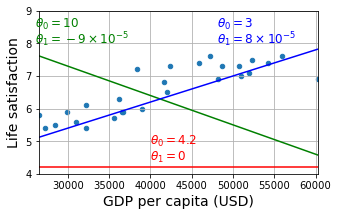

In [238]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

gdppc_col = "GDP per capita (USD)"
lifesat_col = "Life satisfaction"

min_gdp = country_stats[gdppc_col].min()
max_gdp = country_stats[gdppc_col].max()
min_life_sat = 4
max_life_sat = 9

# Scatter plot
country_stats.plot(kind='scatter', figsize=(5, 3), grid=True,
                   x=gdppc_col, y=lifesat_col)

X = np.linspace(min_gdp, max_gdp, 1000)

w1, w2 = 4.2, 0
plt.plot(X, w1 + w2 * 1e-5 * X, "r")
plt.text(40_000, 4.9, fr"$\theta_0 = {w1}$", color="r")
plt.text(40_000, 4.4, fr"$\theta_1 = {w2}$", color="r")

w1, w2 = 10, -9
plt.plot(X, w1 + w2 * 1e-5 * X, "g")
plt.text(26_000, 8.5, fr"$\theta_0 = {w1}$", color="g")
plt.text(26_000, 8.0, fr"$\theta_1 = {w2} \times 10^{{-5}}$", color="g")

w1, w2 = 3, 8
plt.plot(X, w1 + w2 * 1e-5 * X, "b")
plt.text(48_000, 8.5, fr"$\theta_0 = {w1}$", color="b")
plt.text(48_000, 8.0, fr"$\theta_1 = {w2} \times 10^{{-5}}$", color="b")

plt.axis([min_gdp, max_gdp, min_life_sat, max_life_sat])

# Save figure
save_path = Path(r"C:\Users\Atanasius\OneDrive\Documents\A - KULIAH\A - SEMESTER 8\MACHINE LEARNING\Machine-Learning-Enrichment_Task\Chapter-1\images\end_to_end_project\images")
save_path.mkdir(parents=True, exist_ok=True)
fig_filename = save_path / "tweaking_model_params_plot.png"
plt.savefig(fig_filename, dpi=300, bbox_inches='tight')

plt.show()


In [239]:
from sklearn import linear_model

X_sample = country_stats[[gdppc_col]].values
y_sample = country_stats[[lifesat_col]].values

lin1 = linear_model.LinearRegression()
lin1.fit(X_sample, y_sample)

t0, t1 = lin1.intercept_[0], lin1.coef_.ravel()[0]
print(f"θ0={t0:.2f}, θ1={t1:.2e}")

θ0=3.75, θ1=6.78e-05


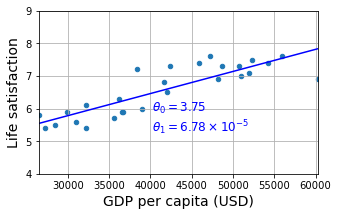

In [240]:
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np

country_stats.plot(kind='scatter', figsize=(5, 3), grid=True,
                   x=gdppc_col, y=lifesat_col)

X = np.linspace(min_gdp, max_gdp, 1000)
plt.plot(X, t0 + t1 * X, "b")

plt.text(max_gdp - 20_000, min_life_sat + 1.9,
         fr"$\theta_0 = {t0:.2f}$", color="b")
plt.text(max_gdp - 20_000, min_life_sat + 1.3,
         fr"$\theta_1 = {t1 * 1e5:.2f} \times 10^{{-5}}$", color="b")

plt.axis([min_gdp, max_gdp, min_life_sat, max_life_sat])

# Save the figure to your folder
save_path = Path(r"C:\Users\Atanasius\OneDrive\Documents\A - KULIAH\A - SEMESTER 8\MACHINE LEARNING\Machine-Learning-Enrichment_Task\Chapter-1\images\end_to_end_project\images")
save_path.mkdir(parents=True, exist_ok=True)
fig_filename = save_path / "best_fit_model_plot.png"
plt.savefig(fig_filename, dpi=300, bbox_inches='tight')

plt.show()


In [241]:
cyprus_gdp_per_capita = gdp_per_capita[gdppc_col].loc["Cyprus"]
cyprus_gdp_per_capita

37655.1803457421

In [242]:
cyprus_predicted_life_satisfaction = lin1.predict([[cyprus_gdp_per_capita]])[0, 0]
cyprus_predicted_life_satisfaction

6.301656332738056

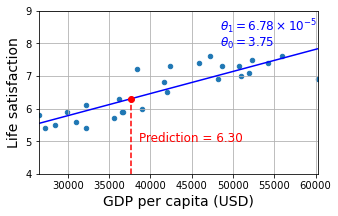

In [243]:
country_stats.plot(kind='scatter', figsize=(5, 3), grid=True,
                   x=gdppc_col, y=lifesat_col)

X = np.linspace(min_gdp, max_gdp, 1000)
plt.plot(X, t0 + t1 * X, "b")

plt.text(min_gdp + 22_000, max_life_sat - 1.1,
         fr"$\theta_0 = {t0:.2f}$", color="b")
plt.text(min_gdp + 22_000, max_life_sat - 0.6,
         fr"$\theta_1 = {t1 * 1e5:.2f} \times 10^{{-5}}$", color="b")

plt.plot([cyprus_gdp_per_capita, cyprus_gdp_per_capita],
         [min_life_sat, cyprus_predicted_life_satisfaction], "r--")
plt.text(cyprus_gdp_per_capita + 1000, 5.0,
         fr"Prediction = {cyprus_predicted_life_satisfaction:.2f}", color="r")
plt.plot(cyprus_gdp_per_capita, cyprus_predicted_life_satisfaction, "ro")

plt.axis([min_gdp, max_gdp, min_life_sat, max_life_sat])

plt.show()

In [244]:
missing_data = full_country_stats[(full_country_stats[gdppc_col] < min_gdp) |
                                  (full_country_stats[gdppc_col] > max_gdp)]
missing_data

,GDP per capita (USD),Life satisfaction
Country,,
South Africa,11466.189672,4.7
Colombia,13441.492952,6.3
Brazil,14063.982505,6.4
Mexico,17887.750736,6.5
Chile,23324.524751,6.5
Norway,63585.903514,7.6
Switzerland,68393.306004,7.5
Ireland,89688.956958,7.0
Luxembourg,110261.157353,6.9


In [247]:
position_text_missing_countries = {
    "South Africa": (20_000, 4.2),
    "Colombia": (6_000, 8.2),
    "Brazil": (18_000, 7.8),
    "Mexico": (24_000, 7.4),
    "Chile": (30_000, 7.0),
    "Norway": (51_000, 6.2),
    "Switzerland": (62_000, 5.7),
    "Ireland": (81_000, 5.2),
    "Luxembourg": (92_000, 4.7),
}

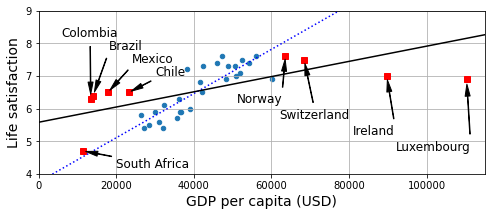

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from sklearn import linear_model


full_country_stats.plot(kind='scatter', figsize=(8, 3),
                        x=gdppc_col, y=lifesat_col, grid=True)

for country, pos_text in position_text_missing_countries.items():
    pos_data_x, pos_data_y = missing_data.loc[country]
    plt.annotate(country, xy=(pos_data_x, pos_data_y),
                 xytext=pos_text, fontsize=12,
                 arrowprops=dict(facecolor='black', width=0.5,
                                 shrink=0.08, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "rs")

X = np.linspace(0, 115_000, 1000)
plt.plot(X, t0 + t1 * X, "b:")

# Fit linear regression on full dataset
lin_reg_full = linear_model.LinearRegression()
Xfull = np.c_[full_country_stats[gdppc_col]]
yfull = np.c_[full_country_stats[lifesat_col]]
lin_reg_full.fit(Xfull, yfull)

t0full, t1full = lin_reg_full.intercept_[0], lin_reg_full.coef_.ravel()[0]
plt.plot(X, t0full + t1full * X, "k")

plt.axis([0, 115_000, min_life_sat, max_life_sat])

# Save figure
save_path = Path(r"C:\Users\Atanasius\OneDrive\Documents\A - KULIAH\A - SEMESTER 8\MACHINE LEARNING\Machine-Learning-Enrichment_Task\Chapter-1\images\end_to_end_project\images")
save_path.mkdir(parents=True, exist_ok=True)
fig_filename = save_path / "representative_training_data_scatterplot.png"
plt.savefig(fig_filename, dpi=300, bbox_inches='tight')

plt.show()


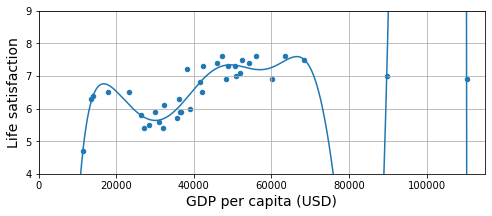

In [253]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn import preprocessing, pipeline, linear_model


full_country_stats.plot(kind='scatter', figsize=(8, 3),
                        x=gdppc_col, y=lifesat_col, grid=True)

poly = preprocessing.PolynomialFeatures(degree=10, include_bias=False)
scaler = preprocessing.StandardScaler()
lin_reg2 = linear_model.LinearRegression()

pipeline_reg = pipeline.Pipeline([
    ('poly', poly),
    ('scal', scaler),
    ('lin', lin_reg2)
])

pipeline_reg.fit(Xfull, yfull)

curve = pipeline_reg.predict(X[:, np.newaxis])
plt.plot(X, curve)

plt.axis([0, 115_000, min_life_sat, max_life_sat])

# Save figure
save_path = Path(r"C:\Users\Atanasius\OneDrive\Documents\A - KULIAH\A - SEMESTER 8\MACHINE LEARNING\Machine-Learning-Enrichment_Task\Chapter-1\images\end_to_end_project\images")
save_path.mkdir(parents=True, exist_ok=True)
fig_filename = save_path / "overfitting_model_plot.png"
plt.savefig(fig_filename, dpi=300, bbox_inches='tight')

plt.show()


In [250]:
w_countries = [c for c in full_country_stats.index if "W" in c.upper()]
full_country_stats.loc[w_countries][lifesat_col]

Country
New Zealand    7.3
Sweden         7.3
Norway         7.6
Switzerland    7.5
Name: Life satisfaction, dtype: float64

In [251]:
all_w_countries = [c for c in gdp_per_capita.index if "W" in c.upper()]
gdp_per_capita.loc[all_w_countries].sort_values(by=gdppc_col)

,GDP per capita (USD)
Country,
Malawi,1486.778248
Rwanda,2098.710362
Zimbabwe,2744.690758
Africa Western and Central,4003.158913
Papua New Guinea,4101.218882
Lower middle income,6722.809932
Eswatini,8392.717564
Low & middle income,10293.855325
Arab World,13753.707307


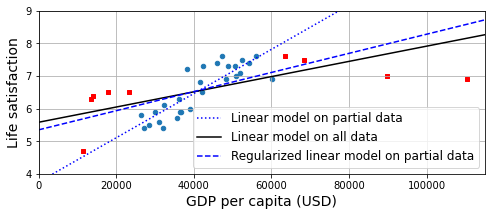

In [254]:
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from sklearn import linear_model

# Assumes these variables are defined beforehand:
# country_stats, missing_data, gdppc_col, lifesat_col
# t0, t1, t0full, t1full, min_life_sat, max_life_sat

country_stats.plot(kind='scatter', x=gdppc_col, y=lifesat_col, figsize=(8, 3))
missing_data.plot(kind='scatter', x=gdppc_col, y=lifesat_col,
                  marker="s", color="r", grid=True, ax=plt.gca())

X = np.linspace(0, 115_000, 1000)
plt.plot(X, t0 + t1 * X, "b:", label="Linear model on partial data")
plt.plot(X, t0full + t1full * X, "k-", label="Linear model on all data")

ridge = linear_model.Ridge(alpha=10**9.5)
X_sample = country_stats[[gdppc_col]]
y_sample = country_stats[[lifesat_col]]
ridge.fit(X_sample, y_sample)
t0ridge, t1ridge = ridge.intercept_[0], ridge.coef_.ravel()[0]
plt.plot(X, t0ridge + t1ridge * X, "b--",
         label="Regularized linear model on partial data")
plt.legend(loc="lower right")

plt.axis([0, 115_000, min_life_sat, max_life_sat])

# Save the figure
save_path = Path(r"C:\Users\Atanasius\OneDrive\Documents\A - KULIAH\A - SEMESTER 8\MACHINE LEARNING\Machine-Learning-Enrichment_Task\Chapter-1\images\end_to_end_project\images")
save_path.mkdir(parents=True, exist_ok=True)
fig_filename = save_path / "ridge_model_plot.png"
plt.savefig(fig_filename, dpi=300, bbox_inches='tight')

plt.show()


### SOAL EXERCISE

1. How would you define Machine Learning?
- Machine Learning adalah cabang ilmu komputer yang memungkinkan komputer belajar pola dari data dan membuat prediksi atau keputusan tanpa diprogram secara eksplisit.
<br><br>

2. Can you name four types of problems where it shines?
- Classification
- Regression
- Clustering
- Anomaly Detection
<br><br>

3. What is a labeled training set?
- Labeled training set adalah kumpulan data yang setiap contoh memiliki input dan label/output yang benar, digunakan untuk melatih model secara supervised.
<br><br>

4. What are the two most common supervised tasks?
- Classification
- Regression
<br><br>

5. Can you name four common unsupervised tasks?
- Clustering
- Anomaly Detection
- Dimension Reduction
- Association Rule Learning
<br><br>

6. What type of Machine Learning algorithm would you use to allow a robot to walk in various unknown terrains?
- Reinforcement Learning, yang belajar melalui interaksi dengan lingkungan dan menerima feedback berupa reward atau punishment.
<br><br>

7. What type of algorithm would you use to segment your customers into multiple groups?
- Algoritma Clustering seperti K-Means atau Hierarchical Clustering.
<br><br>

8. Would you frame the problem of spam detection as a supervised learning problem or an unsupervised learning problem?
- Sebagai masalah supervised learning, karena biasanya menggunakan data email yang sudah dilabeli spam atau bukan untuk melatih model.
<br><br>

9. What is an online learning system?
- Sistem pembelajaran online adalah sistem yang belajar secara terus-menerus dengan menerima data baru secara bertahap, dan memperbarui modelnya tanpa perlu melatih ulang dari awal.
<br><br>

10. What is out-of-core learning?
- Out-of-core learning adalah teknik pembelajaran mesin yang memungkinkan pelatihan model pada dataset yang terlalu besar untuk dimuat sekaligus ke dalam memori komputer, dengan memproses data secara bertahap.
<br><br>

11. What type of learning algorithm relies on a similarity measure to make predictions?
- Algoritma pembelajaran berbasis instance, seperti K-Nearest Neighbors (KNN), yang menggunakan ukuran kemiripan atau jarak antar data untuk membuat prediksi.
<br><br>

12. What is the difference between a model parameter and a learning algorithm’s hyperparameter?
- Parameter model adalah nilai yang dipelajari selama pelatihan (misalnya bobot dalam neural network), sedangkan hyperparameter adalah konfigurasi eksternal yang diatur sebelum pelatihan (misalnya learning rate, jumlah pohon pada random forest).
<br><br>

13. What do model-based learning algorithms search for? What is the most common strategy they use to succeed? How do they make predictions?
- Algoritma pembelajaran berbasis model mencari fungsi atau pola yang cocok dari data pelatihan. Strategi umum yang digunakan adalah meminimalkan fungsi kerugian (loss function). Prediksi dibuat dengan menerapkan fungsi model pada data baru.
<br><br>

14. Can you name four of the main challenges in Machine Learning?
- Overfitting
- Underfitting
- Data yang tidak seimbang
- Data yang berisik (noise) dan outlier
<br><br>

15. If your model performs great on the training data but generalizes poorly to new instances, what is happening? Can you name three possible solutions?
Model mengalami overfitting.
Tiga solusi:
- Mengumpulkan lebih banyak data
- Menggunakan regularisasi (misalnya L1 atau L2)
- Mengurangi kompleksitas model atau menggunakan teknik pruning
<br><br>

16. What is a test set, and why would you want to use it?
- Test set adalah bagian data yang tidak digunakan saat pelatihan, digunakan untuk menguji performa akhir model agar dapat menilai kemampuannya menggeneralisasi ke data baru.
<br><br>

17. What is the purpose of a validation set?
- alidation set digunakan untuk mengatur hyperparameter dan memilih model terbaik selama proses pelatihan, tanpa menggunakan data test set.
<br><br>

18. What is the train-dev set, when do you need it, and how do you use it?
- Train-dev set adalah bagian dari data pelatihan yang digunakan untuk menguji performa model selama pelatihan sebelum validasi. Digunakan terutama jika data tes sangat berbeda dari data pelatihan.
<br><br>

19. What can go wrong if you tune hyperparameters using the test set?
- Jika menggunakan test set untuk tuning hyperparameter, model bisa menjadi bias terhadap test set tersebut, menyebabkan overfitting pada test set dan hasil evaluasi yang tidak valid (data leakage).
<br><br>